**1**. Make a list of consisting of the square of the numbers between 1 and 100 (inclusive) that are not divisible by 3 or 5

- Use a for loop
- Use map and filter
- using `numpy` arrays and vectorized operations

In [1]:
xs = []
for i in range(1, 101):
    if (i % 3) and (i % 5):
        xs.append(i**2)
xs[:10]

[1, 4, 16, 49, 64, 121, 169, 196, 256, 289]

In [2]:
xs = list(map(lambda x: x**2, 
              filter(lambda x: (x % 3) and (x % 5), range(1, 101))))
xs[:10]

[1, 4, 16, 49, 64, 121, 169, 196, 256, 289]

In [3]:
import numpy as np

In [4]:
xs = np.arange(1, 101)
xs = xs[(xs % 3 != 0) & (xs % 5 != 0)]
xs = xs**2
list(xs[:10])

[1, 4, 16, 49, 64, 121, 169, 196, 256, 289]

**2**. Create a dictionary where the keys are the 26 lowercase letters and the values are the numbers 1 to 26. Now create another dictionary with the keys and values flipped.

- Using dictionary comprehensions
- Not using dictionary comprehensions

In [5]:
import string

letters = string.ascii_lowercase
d = {letter: i for i, letter in enumerate(letters, start=1)}
d

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [6]:
d_rev1 = {i: letter for (letter, i) in d.items()}
d_rev1

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [7]:
d_rev2 = dict(zip(d.values(), d.keys()))
d_rev2

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

**3**. A Pythagorean triplet is a tuple of numbers $(a, b, c)$ such that $a^2 + b^2 = c^2$. Find all unique Pythagorean triplets where $a$ and $b$ are each less than 20.

In [8]:
triplets = []
for a in range(1, 20):
    for b in range(a, 20):
        c = (a**2 + b**2)**0.5
        if c.is_integer():
            triplets.append((a, b, c))
triplets            

[(3, 4, 5.0),
 (5, 12, 13.0),
 (6, 8, 10.0),
 (8, 15, 17.0),
 (9, 12, 15.0),
 (12, 16, 20.0)]

**4**. Generate two lists of 1,000,000 random integers between 1 and 1,000,000. Find the numbers which are in *both* lists.

In [9]:
xs1 = np.random.randint(1, 1_000_000, 1_000_000)
xs2 = np.random.randint(1, 1_000_000, 1_000_000)
common = set(xs1).intersection(xs2)
len(common)

399422

In [ ]:
%%file foo.txt
1;2;3 # semi-colon
4:5:6 # colon
7 8 9 # space 

**5**. Read the contents of the file `foo.txt` and use it to populat a 3 $\times$ 3 `numpy` array. Write the `numpy` array back to a file `bar.txt` using tabs as column separators and newlines as row separators.

In [10]:
import re

bar = []
with open('foo.txt') as f:
    for line in f:
        line = line.split('#')[0].strip()
        items = re.split(r'[;|:|\s]', line)
        bar.append(items)
bar = np.array(bar, dtype='int')
bar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
np.savetxt('bar.txt', bar, fmt='%d')

In [12]:
! cat bar.txt

1 2 3
4 5 6
7 8 9


**Alternative solution**: Incredibly, `pandas` can read such files

In [13]:
import pandas as pd
import warnings
warnings.simplefilter('ignore', pd.errors.ParserWarning)

In [14]:
df = pd.read_csv('foo.txt', sep=r'[;|:|\s]', comment='#', header=None)
df.to_csv('bar2.txt', sep=' ', index=False, header=False)
! cat bar2.txt

1 2 3
4 5 6
7 8 9


**6**. Write a function that returns the number of ones in the binary represenation of a positive integer.

In [15]:
def one_bits(n):
    return bin(n).count('1')

In [17]:
bin(999)

'0b1111100111'

In [16]:
one_bits(999)

8

**Alternative solution**

In [20]:
def one_bits2(n):
    """Count the number of 1s in the binary representaiton of n."""
    
    count = 0
    while n != 0:
        n, r = divmod(n, 2)
        count += r
    return count

In [19]:
one_bits2(999)

8

**7**. Create the following matrix using `numpy` operations and as little typing as possible

```
array([[1, 1, 0, 0, 0],
       [2, 2, 2, 0, 0],
       [0, 3, 3, 3, 0],
       [0, 0, 4, 4, 4],
       [0, 0, 0, 5, 5]])
```

In [21]:
np.diag(range(1,6)) + np.diag(range(2,6), -1) + np.diag(range(1,5), 1)

array([[1, 1, 0, 0, 0],
       [2, 2, 2, 0, 0],
       [0, 3, 3, 3, 0],
       [0, 0, 4, 4, 4],
       [0, 0, 0, 5, 5]])

**Alternative solution**

In [22]:
np.fromfunction(lambda i,j: np.where((j<(i+2)) & (i < (j+2)), i+1 , 0), (5,5), dtype='int')

array([[1, 1, 0, 0, 0],
       [2, 2, 2, 0, 0],
       [0, 3, 3, 3, 0],
       [0, 0, 4, 4, 4],
       [0, 0, 0, 5, 5]])

**8**. You are given

```
x = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
y = np.array([  1.32906108,  14.93973105,  35.41812006,  59.36017234,
        91.82978278, 125.74882299, 171.15867425, 219.0626794 ,
       273.14683574, 335.58388112])
```

Find the best least-squares quadratic fit to these data points by solving the normal equations
$$
\beta = (X^T X)^{-1}X^T y
$$

Plot the data and fitted curve.

In [23]:
x = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
y = np.array([  1.32906108,  14.93973105,  35.41812006,  59.36017234,
        91.82978278, 125.74882299, 171.15867425, 219.0626794 ,
       273.14683574, 335.58388112])

In [24]:
X = np.c_[np.ones(10), x, x**2]
β = np.linalg.solve(X.T @ X, X.T @ y)

In [25]:
β

array([-5.57665374,  4.4354525 ,  2.959466  ])

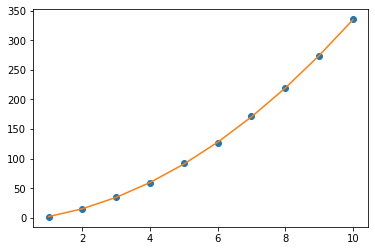

In [26]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(x, X@β);

**9**. Count all unique words in the poem Jabberwocky after removing punctuation and converting to lower case.

In [27]:
poem = """’Twas brillig, and the slithy toves 
      Did gyre and gimble in the wabe: 
All mimsy were the borogoves, 
      And the mome raths outgrabe. 

“Beware the Jabberwock, my son! 
      The jaws that bite, the claws that catch! 
Beware the Jubjub bird, and shun 
      The frumious Bandersnatch!” 

He took his vorpal sword in hand; 
      Long time the manxome foe he sought— 
So rested he by the Tumtum tree 
      And stood awhile in thought. 

And, as in uffish thought he stood, 
      The Jabberwock, with eyes of flame, 
Came whiffling through the tulgey wood, 
      And burbled as it came! 

One, two! One, two! And through and through 
      The vorpal blade went snicker-snack! 
He left it dead, and with its head 
      He went galumphing back. 

“And hast thou slain the Jabberwock? 
      Come to my arms, my beamish boy! 
O frabjous day! Callooh! Callay!” 
      He chortled in his joy. 

’Twas brillig, and the slithy toves 
      Did gyre and gimble in the wabe: 
All mimsy were the borogoves, 
      And the mome raths outgrabe."""

In [28]:
from collections import Counter

table = str.maketrans('', '', '’“”—' + string.punctuation)
c = Counter(poem.translate(table).lower().split())
c.most_common(5)

[('the', 19), ('and', 14), ('he', 7), ('in', 6), ('jabberwock', 3)]

**Alternative**

In [29]:
words = ''.join([char.lower() for char in poem 
                 if char not in '’“”—' + string.punctuation]).split()
counts = {}
for word in words:
    counts[word] = counts.get(word, 0) + 1
sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

[('the', 19), ('and', 14), ('he', 7), ('in', 6), ('jabberwock', 3)]

**10**. Write a Python script called `greet.py` that when run on command line

```
python greet.py foo
```

prints out

```
hello foo
```

but can also be used like so in the notebook

```python
import greet

greet.greet('foo')
```

to print out

```
'hello foo'
```

In [30]:
%%file greet.py

def greet(name):
    print(f'hello {name}')
    
if __name__ == '__main__':
    import sys
    greet(sys.argv[1])

Overwriting greet.py


In [31]:
! cat greet.py


def greet(name):
    print(f'hello {name}')
    
if __name__ == '__main__':
    import sys
    greet(sys.argv[1])


In [32]:
! python3 greet.py foo

hello foo


In [33]:
import greet

greet.greet('foo')

hello foo
